In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [177]:
%%html
<img src=part1.jpg>

In [115]:
#generating examples
X = np.array([[1,-1],[0,-1],[0,1]])
W = np.array([[1,-1,0],[0,0,.5]])
V = np.array([1,0,-1])
b1 = np.array([0,0,1])
b2 = np.array([1])
V = np.reshape(V, (3,1))

In [172]:
def loss(y, y_h):                                        
    result = -y*np.log(y_h)-(1-y)*np.log(1-y_h)
    return -result.sum()
def sigmoid(y_h):
    return 1/(1+np.exp(-y_h))

def yhat(x, W, b1, V, b2):
    #this function is used to calculate the value of yhat given the hidden layer and weights
    #param H the value from the hidden layer
    #param V the weights from hidden layer to yhat
    #param b2 biases
    H = x.dot(W)
    H = np.add(H, b1)
    H = np.where(H>0, H, 0)
    yhat = H.dot(V)
    yhat = np.add(yhat, b2)
    return yhat, H

def ff_nn__ReLu(X, W, V, b, c):
    yhats = []
    for x in X:
        y_h, H = yhat(x, W, b, V, c)
        print(sigmoid(y_h))
        yhats.append(sigmoid(y_h))
    return yhats
ff_nn__ReLu(X,W,V,b1,b2)

[[0.75311061]]
[[0.65080187]]
[[0.84007548]]


[array([[0.75311061]]), array([[0.65080187]]), array([[0.84007548]])]

In [178]:
%%html
<img src=part2.jpg>

[[42265626.    42199732.125 42133925.    ... 36167248.125 36106277.
  36045319.875]
 [39109382.25  39045963.375 38982631.25  ... 33251079.375 33192583.25
  33134101.125]
 [36135726.    36074732.125 36013825.    ... 30512648.125 30456577.
  30400519.875]
 ...
 [33337382.25  33278763.375 33220231.25  ... 27944679.375 27890983.25
  27837301.125]
 [36135726.    36074732.125 36013825.    ... 30512648.125 30456577.
  30400519.875]
 [39109382.25  39045963.375 38982631.25  ... 33251079.375 33192583.25
  33134101.125]]


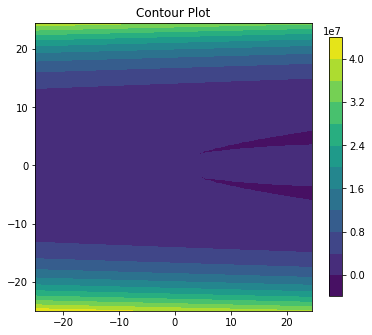

In [37]:
#drawing contour figure of the formula
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height])

x_val = np.arange(-25, 25, .5)
y_val = np.arange(-25, 25, .5)
X, Y = np.meshgrid(x_val, y_val)

#computing zhat
def Z(X, Y):
    Z1 = np.subtract(1, np.power(X, 3))
    Z2 = np.subtract(np.square(Y),X)
    Z2 = np.multiply(100, np.square(Z2))
    Z = np.add(Z1, Z2)
    return Z

#calling z function
Z = Z(X, Y)
print(Z)
#plot contour of the function
cm = plt.cm.get_cmap('viridis')
cp = ax.contourf(X, Y, Z, 10, cmap = cm, origin='lower')
fig.colorbar(cp, ax=ax, shrink=0.9)
ax.set_title('Contour Plot')
plt.show()

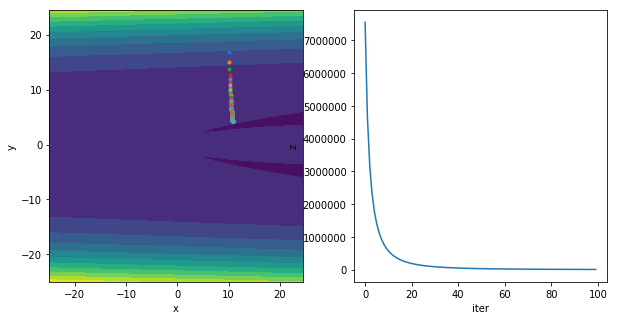

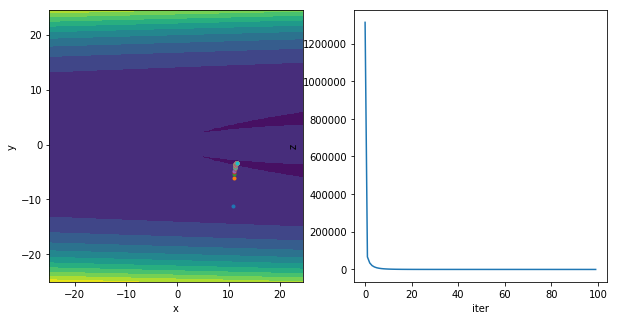

C:\conda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
C:\conda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\conda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
C:\conda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\conda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


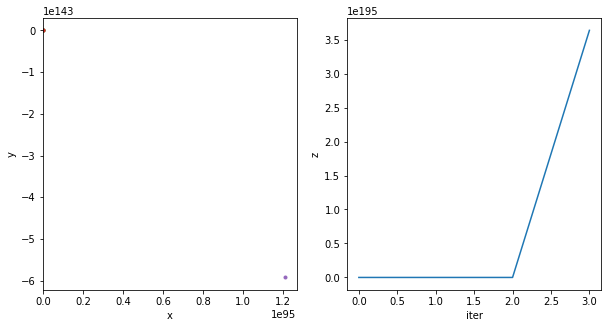

In [53]:
#returns gradients of x and y
def grad_f(x, y):
    dx = -3*x**2-200*y**2+200*x
    dy = 400*y**3-400*x*y
    return np.array([dx, dy])

def grad_desc(x, y, iters, lr):
    steps = []
    zvalue = []
    for i in range(iters):
        dx,dy = grad_f(x, y)
        x = x-lr*dx
        y = y-lr*dy
        z = (1-x**3)+100*(y**2-x)**2
        steps.append([x,y])
        zvalue.append(z)
    return steps, zvalue

#trying different learning rate
for lr in [.000001, .00001, .0001]:
    steps, zvalue = grad_desc(10, 20, 100, lr)
    #visualizing the result
    fig = plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    cm = plt.cm.get_cmap('viridis')
    cp = plt.contourf(X, Y, Z, 10, cmap = cm, origin='lower')
    fig.colorbar(cp, ax=ax, shrink=0.9)
    for step in steps:
        plt.plot(step[0],step[1],'.--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.subplot(1, 2, 2)
    plt.plot(zvalue)
    plt.xlabel('iter')
    plt.ylabel('z')
    plt.show()


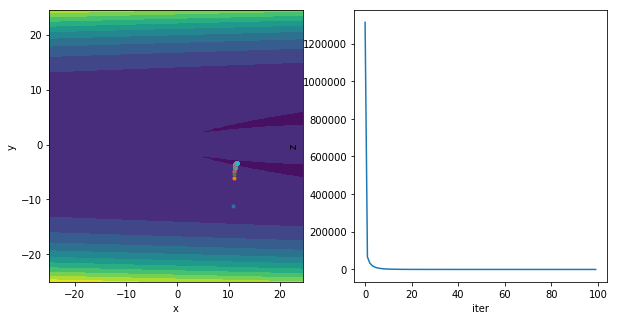

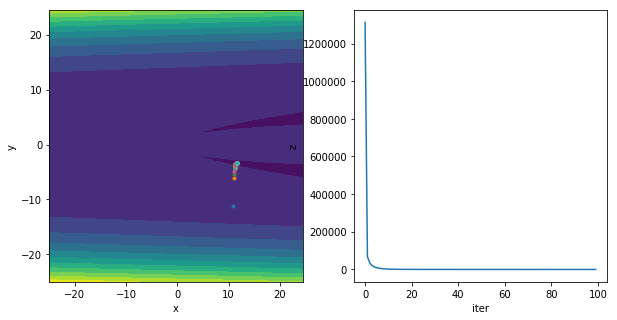

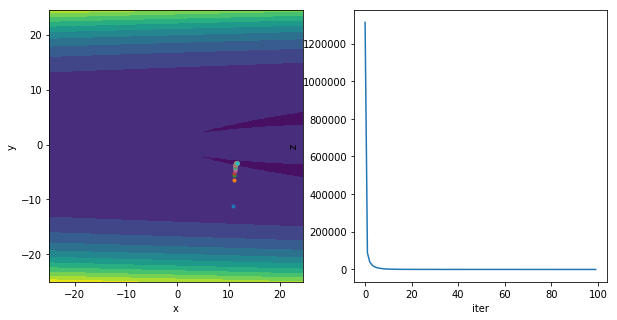

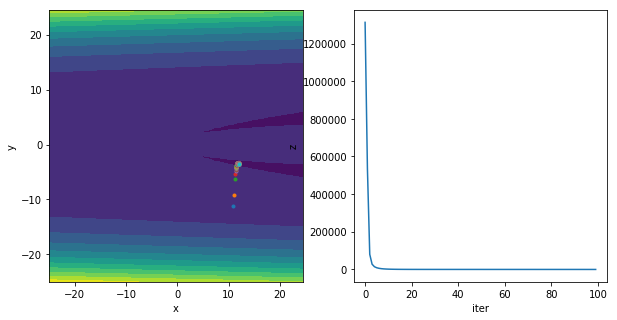

In [49]:
#implement momentum method
def m_grad_desc(x, y, iters, lr, a):
    steps = []
    zvalue = []
    v_x = 0
    v_y = 0
    for i in range(iters):
        dx,dy = grad_f(x, y)
        v_x = a*v_x-lr*dx
        v_y = a*v_y-lr*dy
        x = x+v_x
        y = y+v_y
        z = (1-x**3)+100*(y**2-x)**2
        steps.append([x,y])
        zvalue.append(z)
    return steps, zvalue


for a in [.0001, .001, .01, .1]:
    steps, zvalue = m_grad_desc(10, 20, 100, .00001, a)
    #visualizing the result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    cm = plt.cm.get_cmap('viridis')
    cp = plt.contourf(X, Y, Z, 10, cmap = cm, origin='lower')
    fig.colorbar(cp, ax=ax, shrink=0.9)
    for step in steps:
        plt.plot(step[0],step[1],'.--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.subplot(1, 2, 2)
    plt.plot(zvalue)
    plt.xlabel('iter')
    plt.ylabel('z')
    plt.show()

In [169]:
def reluDerivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def grad_f(X, y, W, V, b1, b2):
    x1, x2 = X
    y_h, H = yhat(X, W, b1, V, b2)
    deri = reluDerivative(H)
    dy_h = y/y_h-(1-y)/(1-y_h)
    dV = dy_h*H.reshape(3,1)
    db2 = dy_h
    dH = dy_h*V.reshape(1,3)*deri
    dHdW = np.array([[x1],
                    [x2]])
    dW = np.dot(dHdW, dH)
    dHdb1 = np.array([1,1,1])
    db1 = np.multiply(dH, dHdb1)
    
    return dV, db2,dW, db1
    
#test
#grad_f(X,1,W, V, b1, b2)

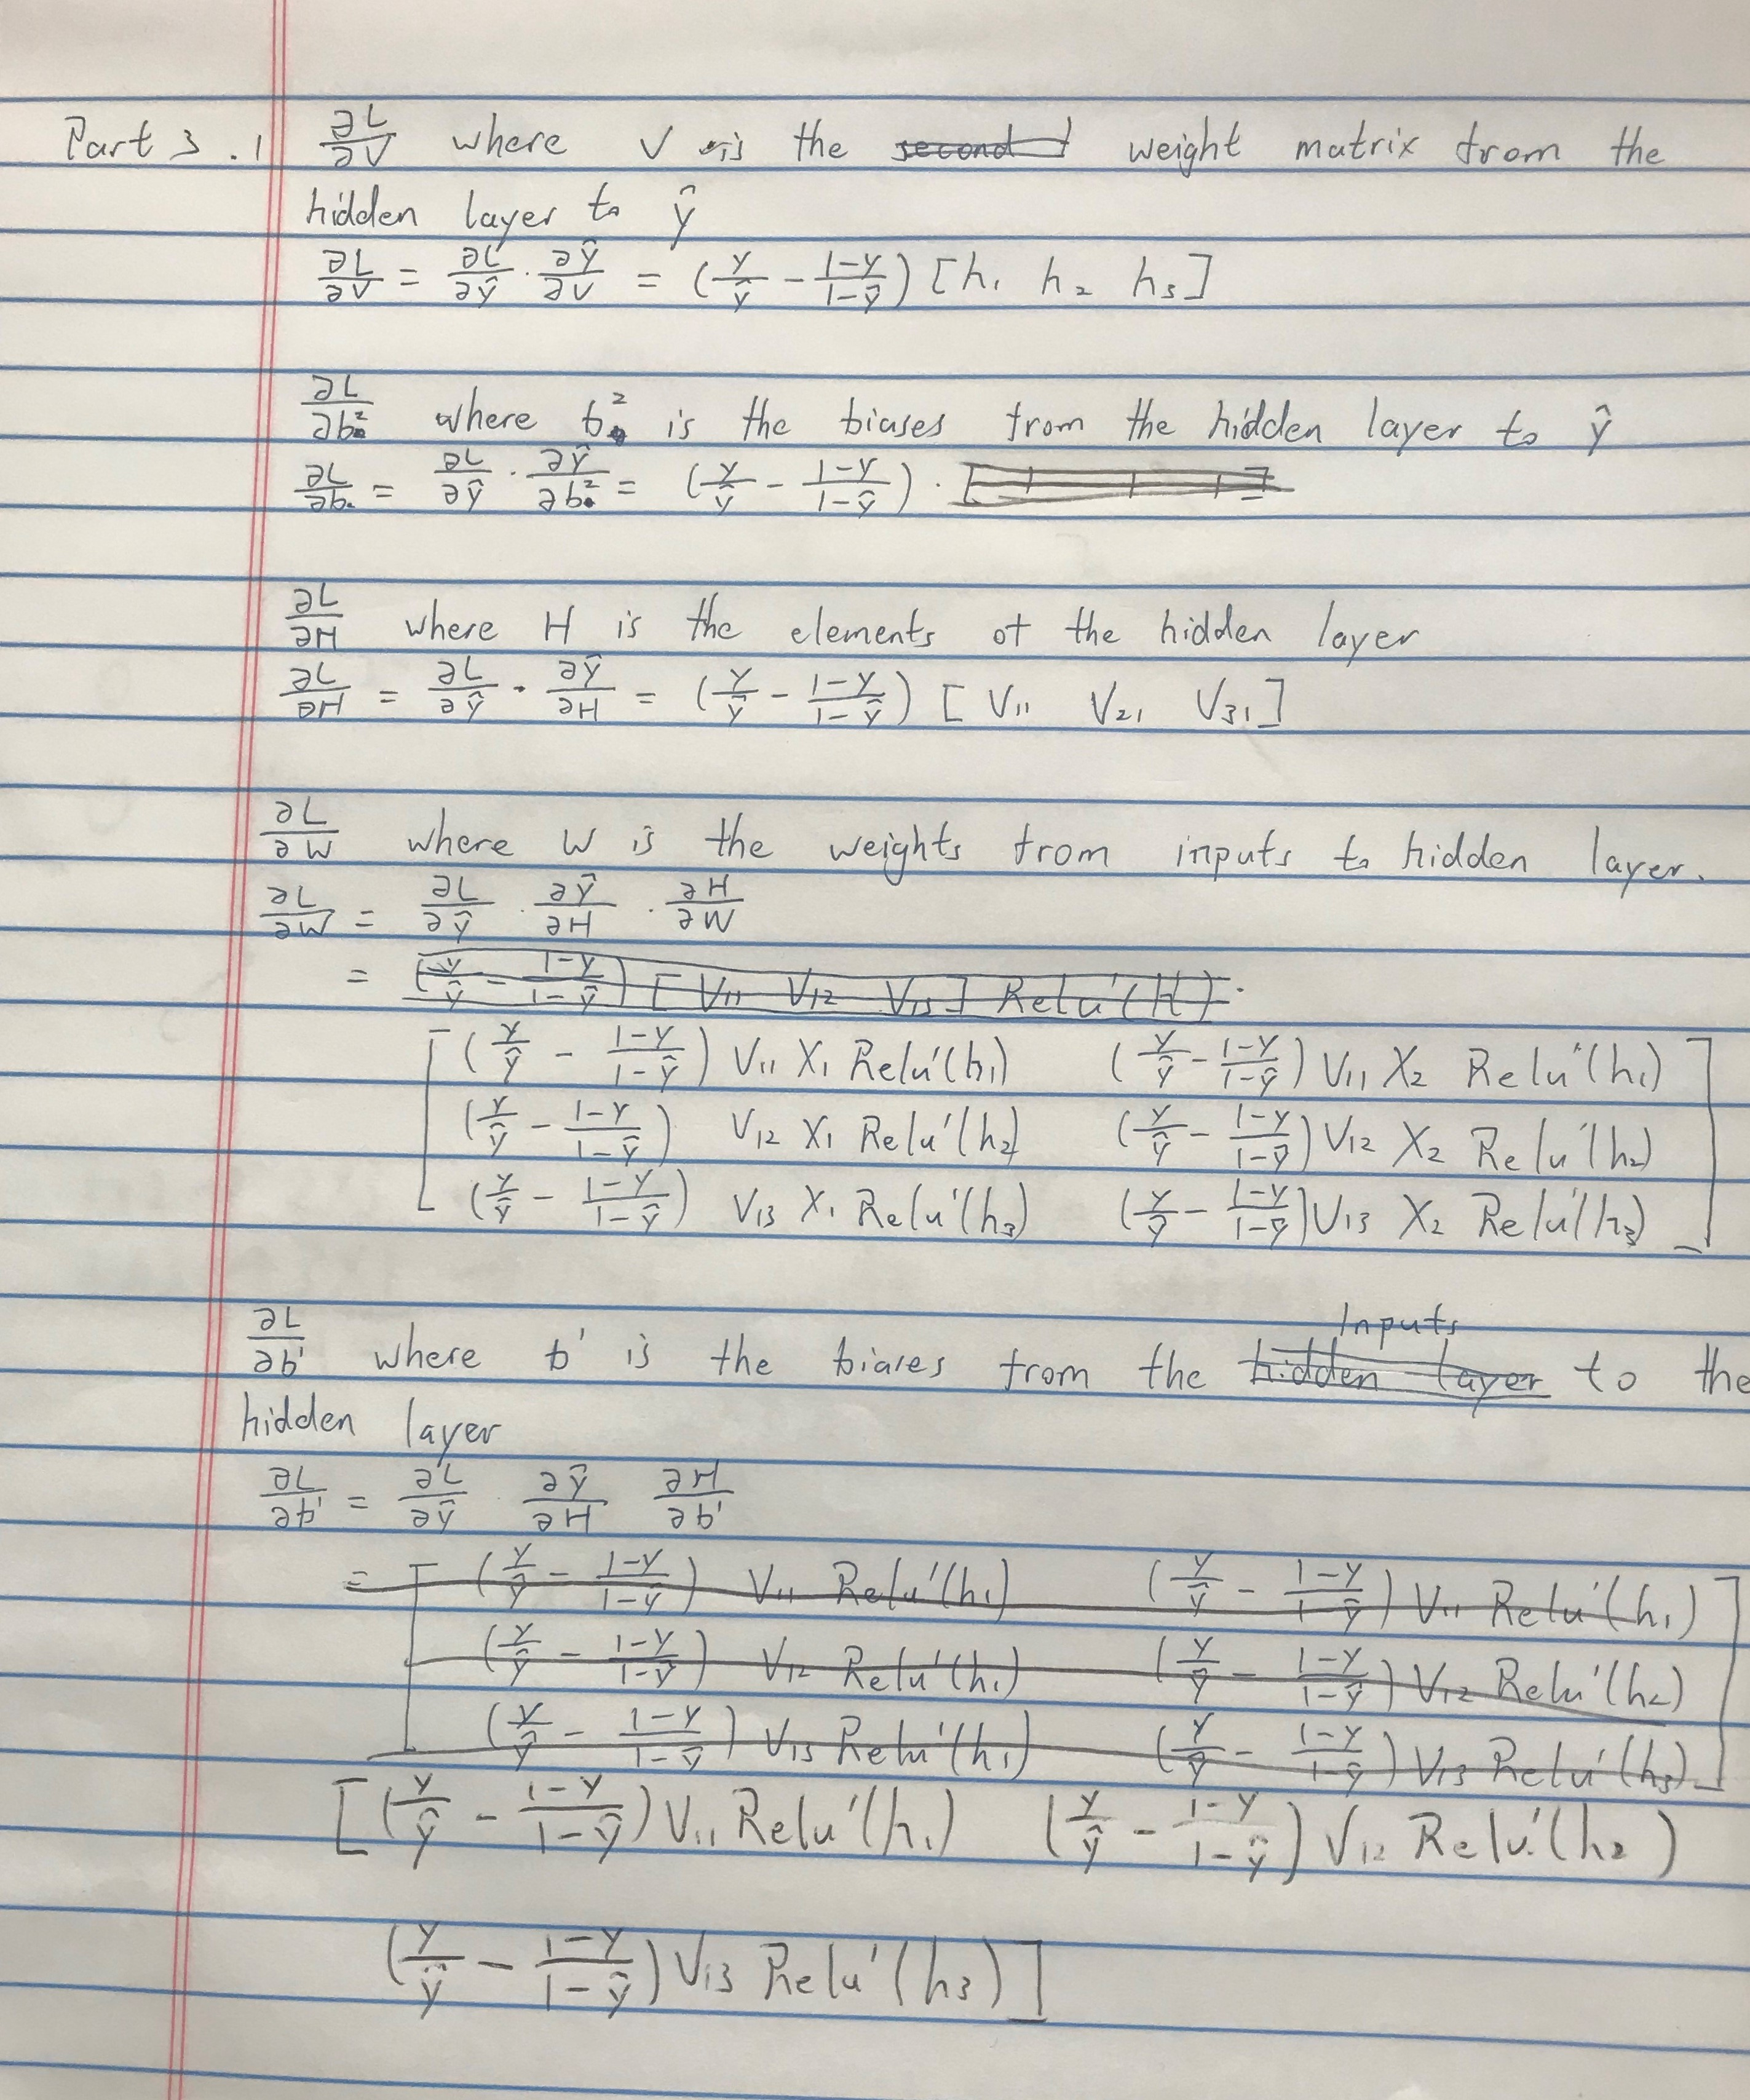

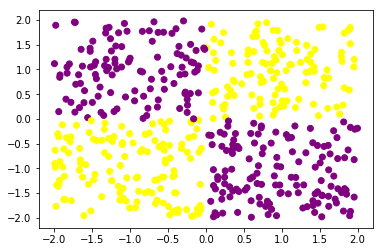

In [161]:
#generating points for xor
def xor(datas):
    #the xor logic gate
    label = np.empty((0,1), int)
    color = []
    for data in datas:
        if data[0] * data[1] > 0:
            label = np.append([1], label)
            color.append('yellow')
        else:
            label = np.append([0], label)
            color.append('purple')
    return color, label

def getData(pts):
    #param pts: number of points wanted in the dataset
    data = np.random.uniform(-2, 2, pts * 2).reshape(pts, 2)
    color, label = xor(data)
    return data, color, label
    
data, color, label = getData(500)
plt.scatter(data[:,0],data[:, 1], color = color)
plt.show()

In [174]:
def grad_descent(X, y, start_point, iters, lr):
    W, V, b1, b2 = start_point
    y_h = ff_nn__ReLu(X,W,V,b1,b2)
    losses = []
    for i in range(iters):
        for i in range(len(X)):
            dV, db2,dW, db1 = grad_f(X[i], y[i], W, V, b1, b2)
            W = W-lr*dW
            V = V-lr*dV
            b1 = b1-lr*db1
            b2 = b2-lr*db2
            y_h, H = yhat(x, W, b1, V, b2)
            losses.append(loss(y, y_h))  

    return losses
#starting point
W = np.random.rand(2, 3)
V = np.random.rand(3, 1)
b1 = np.random.rand(1, 3)
b2 = np.random.rand(1)

grad_descent(data, label, [W, V, b1, b2], 1500, .001)

[[0.78594085]]
[[0.90198801]]
[[0.6436045]]
[[0.92072199]]
[[0.88049154]]
[[0.63452348]]
[[0.74866971]]
[[0.72279951]]
[[0.87383945]]
[[0.82835965]]
[[0.70380512]]
[[0.91393092]]
[[0.9474458]]
[[0.81990384]]
[[0.8815049]]
[[0.61825273]]
[[0.92359342]]
[[0.93781391]]
[[0.94853134]]
[[0.97000449]]
[[0.66066837]]
[[0.9503782]]
[[0.9266597]]
[[0.67037898]]
[[0.66062477]]
[[0.84138258]]
[[0.91333814]]
[[0.95225623]]
[[0.89647065]]
[[0.75214349]]
[[0.66597814]]
[[0.63636258]]
[[0.71393309]]
[[0.97237817]]
[[0.84161643]]
[[0.86201408]]
[[0.67712935]]
[[0.97028395]]
[[0.63710529]]
[[0.82025268]]
[[0.90648064]]
[[0.90884033]]
[[0.80067423]]
[[0.61825273]]
[[0.97847159]]
[[0.68510594]]
[[0.67948242]]
[[0.90903931]]
[[0.64451674]]
[[0.95959736]]
[[0.69928332]]
[[0.92214611]]
[[0.82796787]]
[[0.91807497]]
[[0.73881939]]
[[0.65736455]]
[[0.68471828]]
[[0.61825273]]
[[0.93771241]]
[[0.75048595]]
[[0.96175794]]
[[0.66272875]]
[[0.86643369]]
[[0.83338762]]
[[0.63944259]]
[[0.78439207]]
[[0.64731376]]


C:\conda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan